In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('startups.csv')

In [4]:
df.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.shape

(50, 5)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [9]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

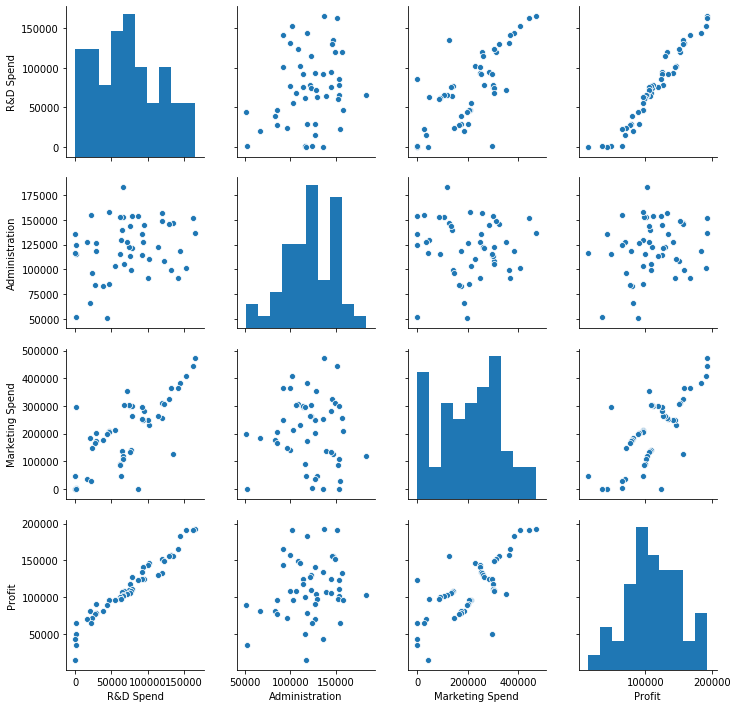

In [10]:
sns.pairplot(df)

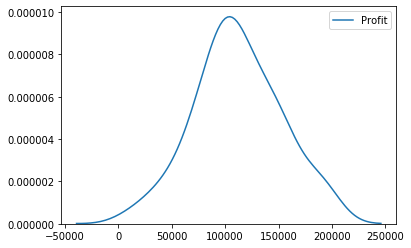

In [11]:
sns.kdeplot(df.Profit)

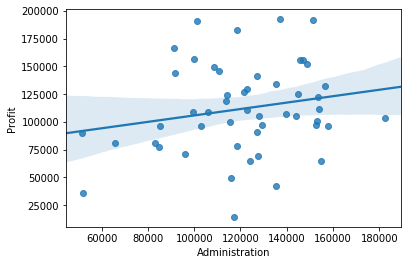

In [12]:
sns.regplot(df.Administration,df.Profit)

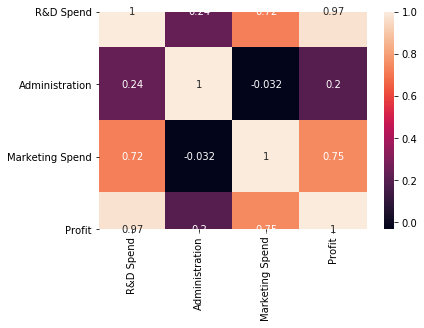

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
pd.crosstab(df.State, df.Profit, margins=True)

Profit,14681.4,35673.41,42559.73,49490.75,64926.08,65200.33,69758.98,71498.49,77798.83,78239.91,...,152211.77,155752.6,156122.51,156991.12,166187.94,182901.99,191050.39,191792.06,192261.83,All
State,,,,,,,,,,,,,,,,,,,,,
California,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,17
Florida,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,16
New York,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,17
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

In [18]:
lm=LinearRegression()

In [19]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pred=lm.predict(x_test)

In [22]:
lm.intercept_

52470.47484674521

In [23]:
results=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficients'])

In [24]:
results

,Coefficients
R&D Spend,0.805355
Administration,-0.035270
Marketing Spend,0.022417


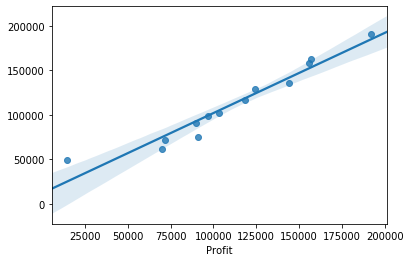

In [25]:
sns.regplot(y_test,pred)

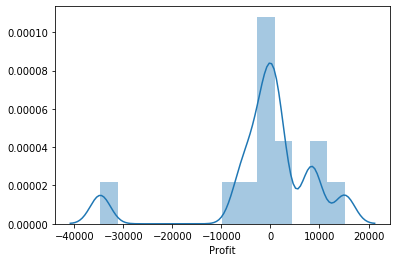

In [26]:
sns.distplot(y_test-pred)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))

MAE: 6654.57339480149
MSE: 126914813.13113965
